In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st

In [11]:
# st.write("""
# # My first app
# Hello *world!*
# """)
 
# df = pd.read_csv("smb_restaurants - dataset.csv")
# st.line_chart(df)

In [12]:
smb_raw =  pd.read_csv("smb_restaurants - dataset.csv")
smb_raw

,business_name,insta_link,insta_followers,insta_ave_views_first5_biz_202309,insta_ave_likes_first5_biz_202309,insta_ave_comments_first5_biz_202309,insta_ave_views_first5_biz_202308,insta_ave_likes_first5_biz_202308,insta_ave_comments_first5_biz_202308,insta_ave_views_first5_biz_202307,...,tiktok_ave_comments_first5_nonbiz_202307,tiktok_ave_views_first5_nonbiz_202306,tiktok_ave_likes_first5_nonbiz_202306,tiktok_ave_comments_first5_nonbiz_202306,tiktok_ave_views_first5_nonbiz_202305,tiktok_ave_likes_first5_nonbiz_202305,tiktok_ave_comments_first5_nonbiz_202305,tiktok_ave_views_first5_nonbiz_202304,tiktok_ave_likes_first5_nonbiz_202304,tiktok_ave_comments_first5_nonbiz_202304
0,Cafe Luna,https://www.instagram.com/cafelunacentralsq/,3160,na,na,na,na,na,na,na,...,4,1821.666667,35.5,3,3020,134,3,0,0,0
1,Moona,https://www.instagram.com/moonarestaurant/,6882,na,50.5,1,na,70,5,na,...,0,18484,1112,10,968,40,5,63700,2569,52
2,4 Corners Pizza,https://www.instagram.com/4cornerspizza/,27000,13548,424,47,23624.5,1096.5,23,29607.66667,...,24.5,16813.5,405.2,3,25633.5,4121,22,1402,43,1.5
3,Hunters,https://www.instagram.com/huntersboston/,21000,12321,256,4.6,7276,260.2,2.6,na,...,0,2212,129.5,1,566,31,1,378.8,12,0.4
4,Ruka Resto Bar,https://www.instagram.com/rukarestobar/,12000,4897,157.4,1.4,2701,118.4,1.8,3869,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Crudo Boston,https://www.instagram.com/crudoboston/,1854,na,na,na,na,na,na,na,...,na,na,na,na,na,na,na,536,20,0
96,Meimei dumplings,https://www.instagram.com/meimeidumplings/,25000,na,439.2,13.2,na,549.4,4,na,...,na,na,na,na,na,na,na,na,na,na
97,Paramount Southie,https://www.instagram.com/paramountsouthie/,3032,na,na,0,na,na,na,na,...,na,na,na,na,na,na,na,na,na,na
98,Teado Central,https://www.instagram.com/teadocentral/,104,na,na,na,na,na,na,na,...,na,na,na,na,na,na,na,na,na,na


In [13]:
smb = smb_raw.replace('na', np.nan)
# Assuming your DataFrame is df
smb.fillna(0, inplace=True)
print(smb)
print(smb.dtypes)

        business_name                                    insta_link  \
0           Cafe Luna  https://www.instagram.com/cafelunacentralsq/   
1               Moona    https://www.instagram.com/moonarestaurant/   
2     4 Corners Pizza      https://www.instagram.com/4cornerspizza/   
3             Hunters      https://www.instagram.com/huntersboston/   
4      Ruka Resto Bar       https://www.instagram.com/rukarestobar/   
..                ...                                           ...   
95       Crudo Boston        https://www.instagram.com/crudoboston/   
96   Meimei dumplings    https://www.instagram.com/meimeidumplings/   
97  Paramount Southie   https://www.instagram.com/paramountsouthie/   
98      Teado Central       https://www.instagram.com/teadocentral/   
99       Trade Boston        https://www.instagram.com/tradeboston/   

   insta_followers insta_ave_views_first5_biz_202309  \
0             3160                                 0   
1             6882                 

In [14]:
smb['insta_followers']

0      3160
1      6882
2     27000
3     21000
4     12000
      ...  
95     1854
96    25000
97     3032
98      104
99     9565
Name: insta_followers, Length: 100, dtype: object

In [15]:
data_types = {'business_name': 'string', 'insta_link': 'string', 'insta_name': 'string', }
smb = smb.astype(data_types)
print(smb.dtypes)

business_name                               string
insta_link                                  string
insta_followers                             object
insta_ave_views_first5_biz_202309           object
insta_ave_likes_first5_biz_202309           object
                                             ...  
tiktok_ave_likes_first5_nonbiz_202305       object
tiktok_ave_comments_first5_nonbiz_202305    object
tiktok_ave_views_first5_nonbiz_202304       object
tiktok_ave_likes_first5_nonbiz_202304       object
tiktok_ave_comments_first5_nonbiz_202304    object
Length: 83, dtype: object


In [16]:
numeric_features = [col for col in smb.columns if col !="business_name" and col !="insta_link" and col !="insta_name"
                   and col !="fb_link" and col !='insta_name.1' and col !="Unnamed: 41" and col !="tiktok_link"]
numeric_features
for feature in numeric_features:
    smb[feature] = pd.to_numeric(smb[feature], errors='coerce')
print(smb.dtypes)

business_name                                string
insta_link                                   string
insta_followers                               int64
insta_ave_views_first5_biz_202309           float64
insta_ave_likes_first5_biz_202309           float64
                                             ...   
tiktok_ave_likes_first5_nonbiz_202305       float64
tiktok_ave_comments_first5_nonbiz_202305    float64
tiktok_ave_views_first5_nonbiz_202304       float64
tiktok_ave_likes_first5_nonbiz_202304       float64
tiktok_ave_comments_first5_nonbiz_202304    float64
Length: 83, dtype: object


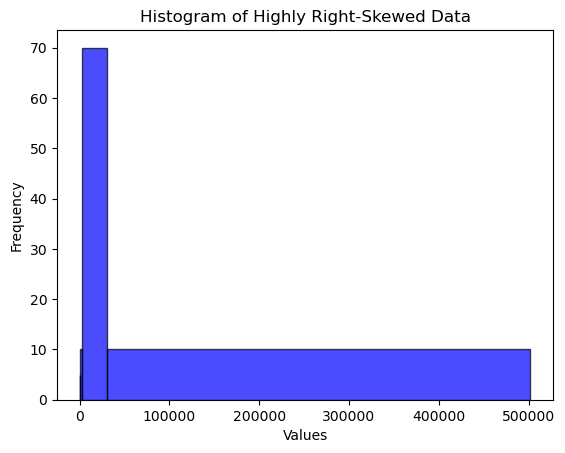

In [24]:
# plt.hist(smb['insta_followers'], bins=20, edgecolor='k')
quantiles = np.percentile(smb['insta_followers'], [0,5,10,20,90,100])
plt.hist(smb['insta_followers'], bins=quantiles, edgecolor='black', color='blue', alpha=0.7)
plt.title('Histogram of Highly Right-Skewed Data')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()


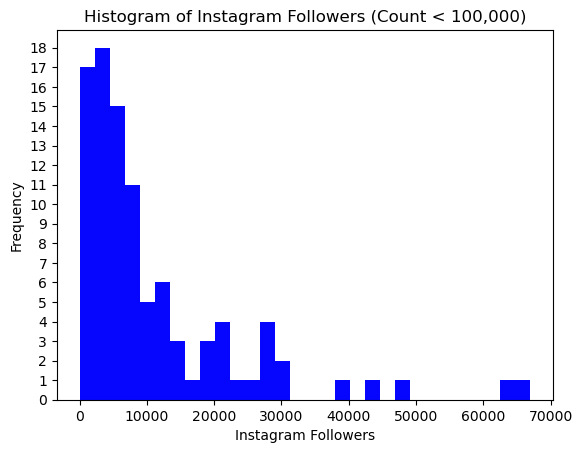

In [28]:
# plt.hist(smb['insta_followers'])


# import matplotlib.pyplot as plt

# Filter data for insta_followers less than 100000
filtered_data = smb[smb['insta_followers'] < 100000]['insta_followers']

# Plot the histogram
plt.hist(filtered_data, bins=30, color='blue', alpha=0.7)
plt.xlabel('Instagram Followers')
plt.ylabel('Frequency')
plt.title('Histogram of Instagram Followers (Count < 100,000)')
plt.yticks(range(int(min(plt.hist(filtered_data, bins=30, color='blue', alpha=0.7)[0])), int(max(plt.hist(filtered_data, bins=30, color='blue', alpha=0.7)[0])) + 1))
plt.show()

In [20]:
quantiles

array([     0. ,    998. ,   2486.6,   3775. ,   5400. ,   6748.5,
         8675.2,  13000. ,  20600. ,  30080. , 502000. ])

In [9]:
insta_features = [col for col in numeric_features if col.startswith("insta_")]
fb_features = [col for col in numeric_features if col.startswith("fb_")]
tt_features = [col for col in numeric_features if col.startswith("tiktok_")]

insta_features
tt_features
fb_features
fb_features_noview = [col for col in fb_features if "_views_" not in col]
fb_features_noview;

In [16]:
insta_follower_quantile = smb['insta_followers'].quantile([0, 0.25, 0.5, 0.75, 1])
smb[f'{feature}_quantile'] = pd.cut(smb['insta_followers'], bins=insta_follower_quantile, labels=['Q1', 'Q2', 'Q3', 'Q4'])
fb_follower_quantile= smb['fb_followers'].quantile([0, 0.25, 0.5, 0.75, 1])
smb[f'{feature}_quantile'] = pd.cut(smb['fb_followers'], bins=fb_follower_quantile, labels=['Q1', 'Q2', 'Q3', 'Q4'])
tt_follower_quantile= smb['tiktok_followers'].quantile([0, 0.25, 0.5, 0.75, 1])
#smb[f'{feature}_quantile'] = pd.cut(smb['tiktok_followers'], bins=tt_follower_quantile, labels=['Q1', 'Q2', 'Q3', 'Q4'], duplicates='drop')
# # print(smb)

In [17]:
# Define the platforms
platforms = ['insta', 'fb', 'tiktok']  # Add more platforms as needed

# Iterate through each platform
for platform in platforms:
    # Create column names for likes, comments, and views
    likes_columns = smb.filter(like=f'{platform}_ave_likes_')
    comments_columns = smb.filter(like=f'{platform}_ave_comments_')
    views_columns = smb.filter(like=f'{platform}_ave_views_')

    # Create total likes, comments, and views columns
    smb[f'total_{platform}_views'] = views_columns.sum(axis=1)
    smb[f'total_{platform}_likes'] = likes_columns.sum(axis=1)
    smb[f'total_{platform}_comments'] = comments_columns.select_dtypes(include='number').sum(axis=1)

total_enaggement = smb.filter(like='total_')
total_enaggement

,total_insta_views,total_insta_likes,total_insta_comments,total_fb_views,total_fb_likes,total_fb_comments,total_tiktok_views,total_tiktok_likes,total_tiktok_comments
0,0.00000,51.333333,6.333333,0.0,26.00,7.0,110293.333337,5764.166667,48.500000
1,0.00000,316.966667,14.600000,0.0,4.05,0.0,84574.000000,3728.000000,67.000000
2,135063.83334,5107.166666,252.500000,0.0,17.50,3.0,90533.666667,6748.200000,63.333333
3,46977.00000,1422.600000,43.400000,0.0,1.00,0.0,4145.800000,178.500000,2.400000
4,23002.00000,725.800000,12.600000,0.0,12.64,0.0,5325.500000,223.000000,2.000000
...,...,...,...,...,...,...,...,...,...
95,0.00000,0.000000,0.000000,0.0,0.00,0.0,1740.500000,50.000000,0.500000
96,0.00000,1848.600000,37.800000,0.0,93.50,10.2,5730.852381,342.200000,4.700000
97,0.00000,0.000000,2.200000,0.0,0.00,0.0,0.000000,0.000000,0.000000
98,0.00000,41.000000,2.000000,0.0,6.10,0.6,86.250000,2.750000,0.000000


In [18]:
insta_like_quantile = smb['total_insta_likes'].quantile([0, 0.25, 0.5, 0.75, 1])
smb[f'{feature}_quantile'] = pd.cut(smb['total_insta_likes'], bins=insta_like_quantile, labels=['Q1', 'Q2', 'Q3', 'Q4'])
insta_comment_quantile= smb['total_insta_comments'].quantile([0, 0.25, 0.5, 0.75, 1])
smb[f'{feature}_quantile'] = pd.cut(smb['total_insta_comments'], bins=insta_comment_quantile, labels=['Q1', 'Q2', 'Q3', 'Q4'])
insta_view_quantile= smb['total_insta_views'].quantile([0, 0.25, 0.5, 0.75, 1])
# smb[f'{feature}_quantile'] = pd.cut(smb['total_insta_views'], bins=insta_view_quantile, labels=['Q1', 'Q2', 'Q3', 'Q4'])

fb_like_quantile = smb['total_fb_likes'].quantile([0, 0.25, 0.5, 0.75, 1])
#smb[f'{feature}_quantile'] = pd.cut(smb['total_fb_likes'], bins=fb_like_quantile, labels=['Q1', 'Q2', 'Q3', 'Q4'])
fb_comment_quantile= smb['total_fb_comments'].quantile([0, 0.25, 0.5, 0.75, 1])
#smb[f'{feature}_quantile'] = pd.cut(smb['total_fb_comments'], bins=fb_comment_quantile, labels=['Q1', 'Q2', 'Q3', 'Q4'])
fb_view_quantile= smb['total_fb_views'].quantile([0, 0.25, 0.5, 0.75, 1])
# smb[f'{feature}_quantile'] = pd.cut(smb['total_fb_views'], bins=fb_view_quantile, labels=['Q1', 'Q2', 'Q3', 'Q4'])

tiktok_like_quantile = smb['total_tiktok_likes'].quantile([0, 0.25, 0.5, 0.75, 1])
smb[f'{feature}_quantile'] = pd.cut(smb['total_tiktok_likes'], bins=tiktok_like_quantile, labels=['Q1', 'Q2', 'Q3', 'Q4'])
tiktok_comment_quantile= smb['total_tiktok_comments'].quantile([0, 0.25, 0.5, 0.75, 1])
smb[f'{feature}_quantile'] = pd.cut(smb['total_tiktok_comments'], bins=tiktok_comment_quantile, labels=['Q1', 'Q2', 'Q3', 'Q4'])
tiktok_view_quantile= smb['total_tiktok_views'].quantile([0, 0.25, 0.5, 0.75, 1])
smb[f'{feature}_quantile'] = pd.cut(smb['total_tiktok_views'], bins=tiktok_view_quantile, labels=['Q1', 'Q2', 'Q3', 'Q4'])

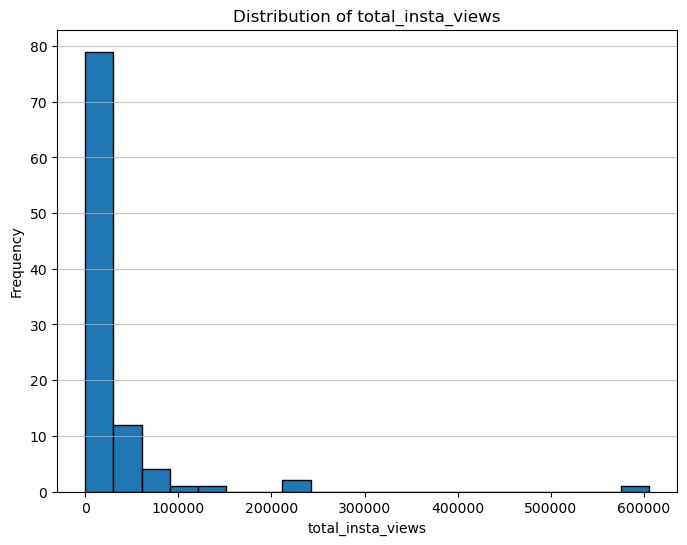

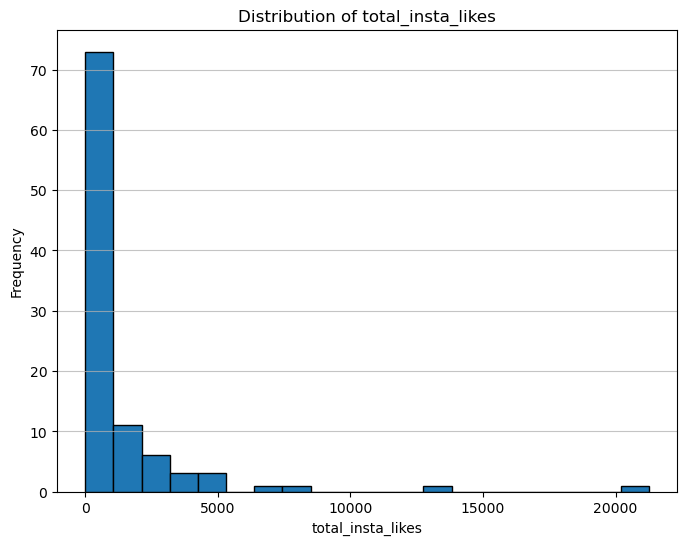

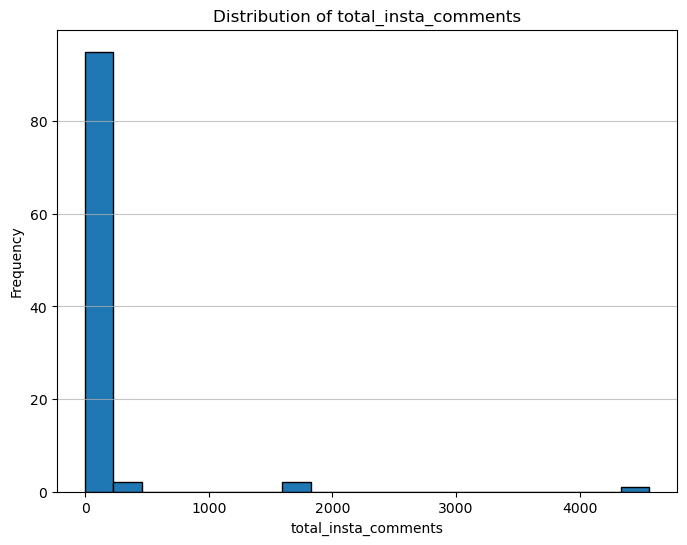

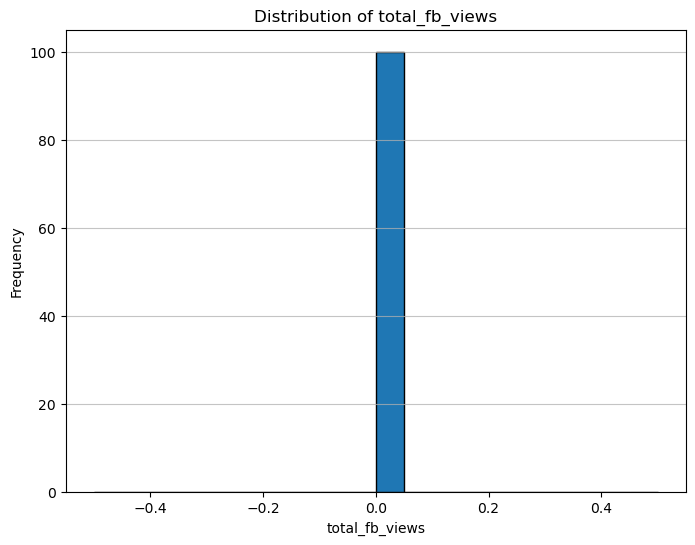

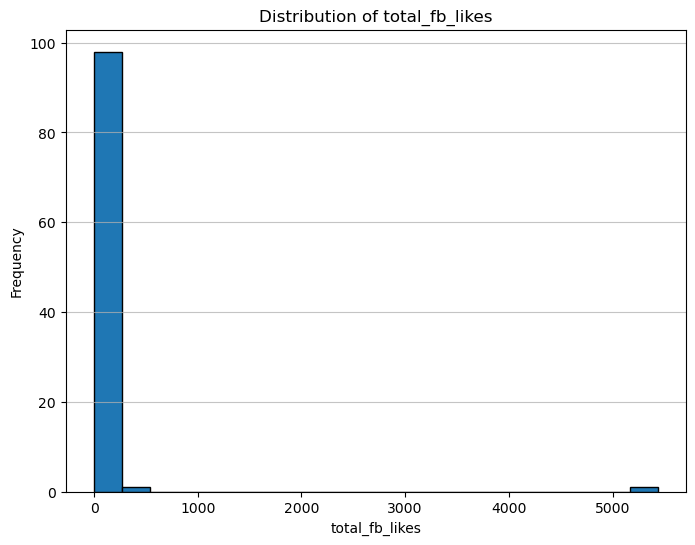

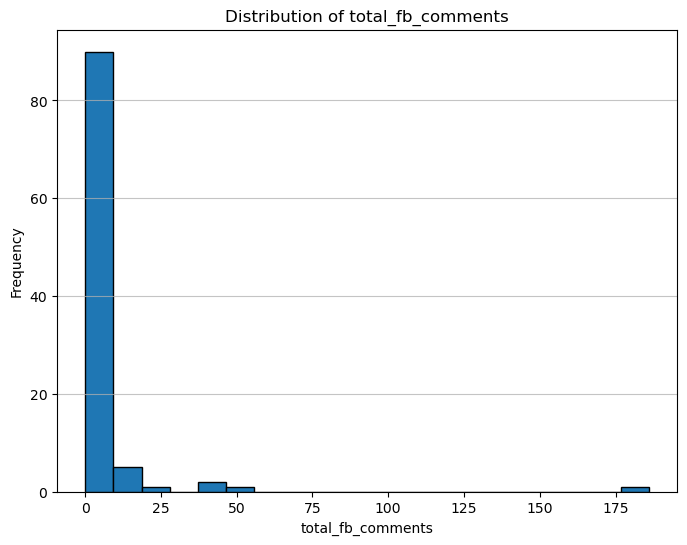

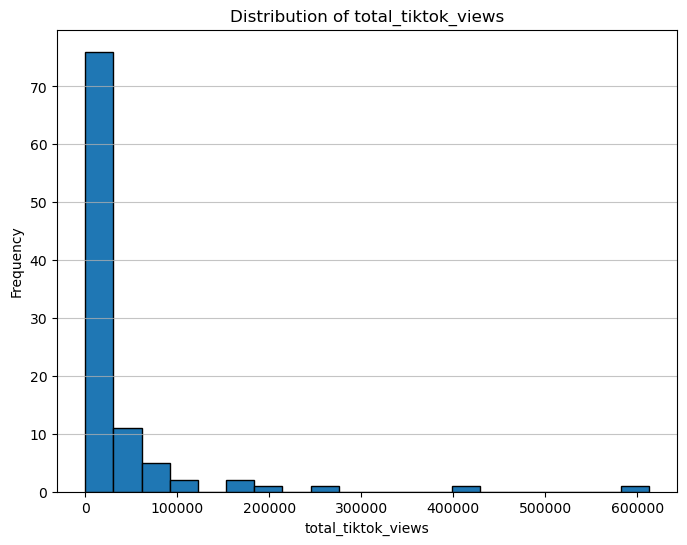

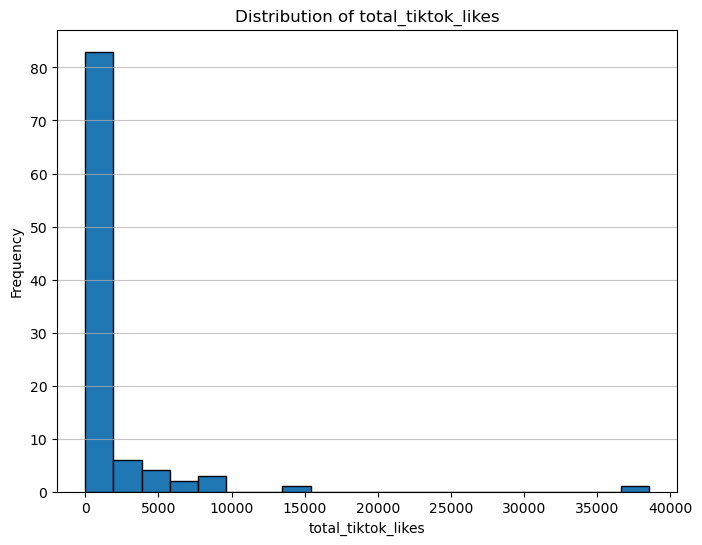

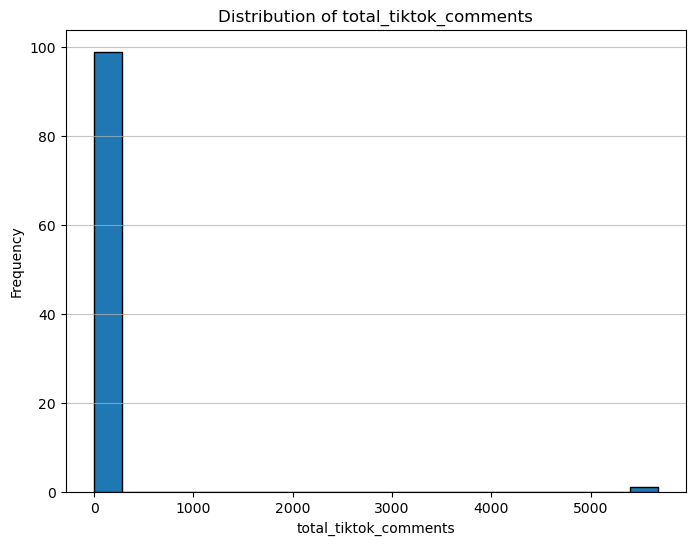

In [19]:
for column in total_enaggement:
    plt.figure(figsize=(8, 6))
    plt.hist(smb[column], bins=20, edgecolor='k')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.75)
    plt.show()

In [ ]:
def plot_histogram(restaurant_name, data):
    plt.figure(figsize=(10, 6))
    plt.hist(smb['insta_followers'], bins=20, color='blue', alpha=0.7)
    plt.axvline(data[data['Restaurant'] == restaurant_name]['Followers'].values[0], color='red', linestyle='dashed', linewidth=2)
    plt.title('Instagram Followers Histogram')
    plt.xlabel('Followers')
    plt.ylabel('Frequency')
    st.pyplot()